# Reducción de dimensionalidad

En este _notebook_ vamos aprender varios tópicos de reducción de dimensionalidad. Primero vamos a ver el algoritmo PCA y luego el algoritmo TSNE. También vamos a ver cómo podemos usar PCA para realizar compresión de imágenes.

## PCA

PCA es un algoritmo clásico de reducción de dimensionalidad que se basa en la **descomposición de valores singulares** de una matriz. Vamos a ver cómo usar la implementación de este algoritmo en Scikit Learn. Para este ejemplo vamos a tomar el _dataset_ de las flores Iris. Vamos a tomar las cuatro columnas (largo y ancho del pétalo y sépalo) y vamos a generar una representación en dos dimensiones.

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd

iris = load_iris()

# Recordemos que el dataset original tiene 4 features
X = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = iris['target']

X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Ahora vamos a reducir la dimensionalidad. Para esto vamos a usar la clase `PCA` que ya importamos. Le vamos a pedir que transforme este _dataset_ a uno de dos dimensiones.

In [2]:
# Ahora vamos a reducir la dimensionalidad

# Queremos reducir a dos dimensiones
pca = PCA(n_components=2)

# Guardamos el dataset pero ahora en su versión reducida en 2 dimensiones
X_2D = pca.fit_transform(X)
X_2D = pd.DataFrame(X_2D, columns=["dimension 1", "dimension 2"])
X_2D

,dimension 1,dimension 2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


Lo que hicimos fue pasar de un _dataset_ de 4 dimensiones a uno de 2 dimensiones. Como bien sabemos, no podíamos visualizar el _dataset_ de 4 dimensiones, pero uno de 2 dimensiones si lo podemos visualizar.

### Importante

Un error habitual es pensar que las nuevas columnas vienen del _dataset_ de altas dimensiones, por lo que es importante recalcar que las nuevas columnas **no están tomadas del _dataset_ en 4 dimensiones**. Aquí estamos generando nuevas dimensiones en base a las proyecciones de los puntos en el hiperplano en bajas dimensiones.

Ahora vamos a visualizar el nuevo _dataset_.

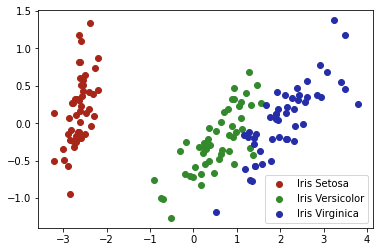

In [3]:
import matplotlib.pyplot as plt

cmap_bold = ['#a72618', '#34892d', '#262ea7']

plt.scatter(X_2D[y==0]["dimension 1"], X_2D[y==0]["dimension 2"], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X_2D[y==1]["dimension 1"], X_2D[y==1]["dimension 2"], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X_2D[y==2]["dimension 1"], X_2D[y==2]["dimension 2"], c=cmap_bold[2], label='Iris Virginica')

plt.legend()
plt.show()

Como vemos, esta representación se parece en algo a cuando solo graficamos el largo y ancho del pétalo, pero con las flores versicolor y virgínica un poco más mezclada. Sin embargo, estamos mostrando la información de un _dataset_ de cuatro dimensiones en un plano de dos dimensiones. Por lo tanto, es natural pensar que vamos a perder un poco de información.


**Ojo**: uno puede entrenar un modelo usando esta versión, ya que es más liviano que entrenar un modelo con 4 _features_, y además uno podría ver la frontera de decisión.

### Estandarización de las columnas

Algo muy importante a la hora de usar PCA es que las columnas deben estar estandarizadas. Esto mejora bastante el rendimiento del algoritmo cuando las columnas tienen distintos órdenes de magnitud. Vamos a ver cómo hacer esto con Scikit Learn.

In [4]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)
X_std

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [5]:
# Ahora vamos a reducir la dimensión del dataset estandarizado

# Queremos reducir a dos dimensiones
pca = PCA(n_components=2)

# Guardamos el dataset pero ahora en su versión reducida en 2 dimensiones
X_2D = pca.fit_transform(X_std)
X_2D = pd.DataFrame(X_2D, columns=["dimension 1", "dimension 2"])
X_2D

,dimension 1,dimension 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


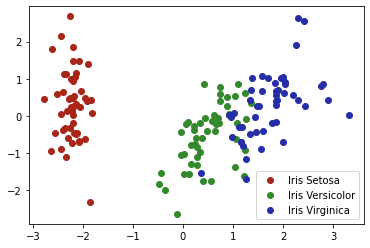

In [6]:
import matplotlib.pyplot as plt

cmap_bold = ['#a72618', '#34892d', '#262ea7']

plt.scatter(X_2D[y==0]["dimension 1"], X_2D[y==0]["dimension 2"], c=cmap_bold[0], label='Iris Setosa')
plt.scatter(X_2D[y==1]["dimension 1"], X_2D[y==1]["dimension 2"], c=cmap_bold[1], label='Iris Versicolor')
plt.scatter(X_2D[y==2]["dimension 1"], X_2D[y==2]["dimension 2"], c=cmap_bold[2], label='Iris Virginica')

plt.legend()
plt.show()

### Varianza de cada componente

Como discutimos en clases, podemos ver el porcentaje de varianza guardado por cada componente. Esta es una forma de medir cuanta información del _dataset_ original guarda la transformación.

In [7]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

Podemos graficar esto con un Barplot.

<BarContainer object of 2 artists>

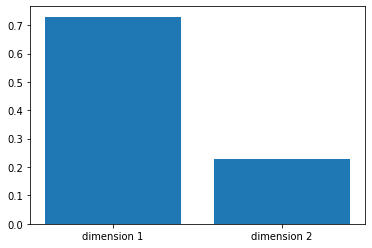

In [8]:
plt.bar(X_2D.columns, pca.explained_variance_ratio_)

Así, la primera componente "guarda" un 72% de la varianza total, y la segunda componente guarda 22%. Veamos que pasa al hacer reducción de dimensionalidad de 3 dimensiones.

In [9]:
# Queremos reducir a tres dimensiones
pca = PCA(n_components=3)

# Guardamos el dataset pero ahora en su versión reducida en 2 dimensiones
X_3D = pca.fit_transform(X_std)
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

Como vemos, la tercera componente guarda 3% de la varianza del _dataset_ original. ¿Cómo podemos escoger el número de componentes sobre cierto _threshold_? Se le puede indicar al constructor de la clase `PCA`. En este caso, le vamos a pedir un número de componentes suficiente para tener el 95% de la varianza del _dataset_.

In [10]:
# Queremos reducir a las dimensiones suficientes para preservar un 95% de la varianza al menos
pca = PCA(n_components=0.95)

# Guardamos el dataset pero ahora en su versión reducida en 2 dimensiones
X_PCA = pca.fit_transform(X_std)
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

### Importante

Recordemos que lo que hace PCA es aprender una representación en bajas dimensiones de los datos. Así, imaginemos que vamos de paseo y encontramos una flor Iris. Si queremos reducir la dimensión de esa flor **no vamos a entrenar el algoritmo de nuevo**, sino que vamos a usar la representación aprendida para transformar este nuevo dato.

In [11]:
nueva_flor = [1, 2, 3, 4]

# Primero estandarizamos con el mismo estandarizador que usamos anteriormente
nueva_flor_std = std_scaler.transform([nueva_flor])

nueva_flor_2D = pca.transform(nueva_flor_std)

# Esta es la representación de la flor en dos dimensiones
nueva_flor_2D

array([[-0.57000112, -4.22591697]])

## Reducción de dimensionalidad del dataset MNIST

Ahora vamos a reducir las dimensiones del _dataset_ MNIST a dos dimensiones. Así, vamos a poder graficar el _dataset_ MNIST en un plano. **Ojo**: vamos a tomar solo las primeras 2000 flores para que tome menos tiempo.

In [12]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=True)
X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)

# Tomamos los primeros 2000 elementos para que tome menos tiempo.
X, y = X[:2000], y[:2000]

# Estandarizamos los datos
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)

pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_std)
X_2D

array([[-0.42046279, -3.88620838],
       [ 9.22651449, -6.51321942],
       [ 2.22027904,  9.11644914],
       ...,
       [ 9.26355073,  0.65491591],
       [-4.88033836,  0.07041454],
       [24.21428874, -1.04088722]])

In [13]:
y

0       5
1       0
2       4
3       1
4       9
       ..
1995    0
1996    5
1997    5
1998    2
1999    0
Name: class, Length: 2000, dtype: uint8

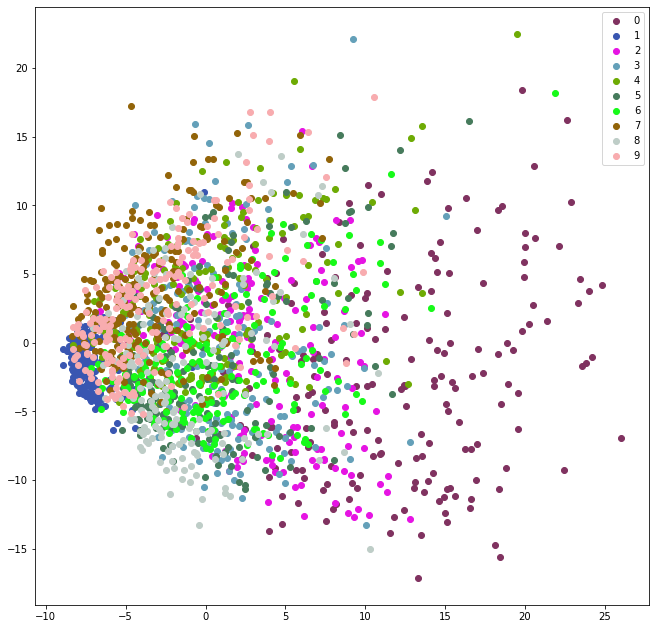

In [14]:
cmap_bold = ['#803260', '#3956b1', '#e614e3', '#64a0b9', '#6eab04', 
             '#467b5c', '#17fa19', '#926409', '#becdc7', '#f8acaf']

plt.figure(figsize=(11, 11))

plt.scatter(X_2D[y==0, 0], X_2D[y==0, 1], c=cmap_bold[0], label='0')
plt.scatter(X_2D[y==1, 0], X_2D[y==1, 1], c=cmap_bold[1], label='1')
plt.scatter(X_2D[y==2, 0], X_2D[y==2, 1], c=cmap_bold[2], label='2')
plt.scatter(X_2D[y==3, 0], X_2D[y==3, 1], c=cmap_bold[3], label='3')
plt.scatter(X_2D[y==4, 0], X_2D[y==4, 1], c=cmap_bold[4], label='4')
plt.scatter(X_2D[y==5, 0], X_2D[y==5, 1], c=cmap_bold[5], label='5')
plt.scatter(X_2D[y==6, 0], X_2D[y==6, 1], c=cmap_bold[6], label='6')
plt.scatter(X_2D[y==7, 0], X_2D[y==7, 1], c=cmap_bold[7], label='7')
plt.scatter(X_2D[y==8, 0], X_2D[y==8, 1], c=cmap_bold[8], label='8')
plt.scatter(X_2D[y==9, 0], X_2D[y==9, 1], c=cmap_bold[9], label='9')


plt.legend()

plt.show()

Como vemos, este método no nos sirve para visualizar bien. Vamos a explorar la varianza que guarda cada componente para entender qué esta pasando.

In [15]:
pca.explained_variance_ratio_

array([0.06194208, 0.04905716])

<BarContainer object of 2 artists>

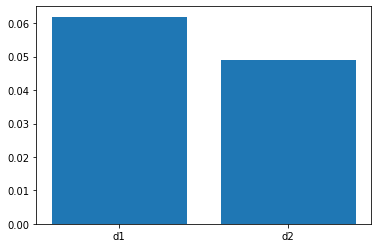

In [16]:
plt.bar(["d1", "d2"], pca.explained_variance_ratio_)

Como vemos, entre las dos dimensiones tenemos cerca del 10% de la varianza del _dataset_. Si consideramos que pasamos de 784 dimensiones a 2, no está mal. Sin embargo, no es útil para hacer una visualización. Por lo mismo, vamos a probar con otra técnica llamada T-SNE.

## T-SNE

T-SNE es un método de reducción de dimensionalidad principalmente usado para hacer visualizaciones en dos dimensiones. Se basa en la idea en que **dos instancias similares van a quedar juntas en la representación en baja dimensión**. Vamos a ver cómo podemos visualizar el _dataset_ MNIST con esta técnica.

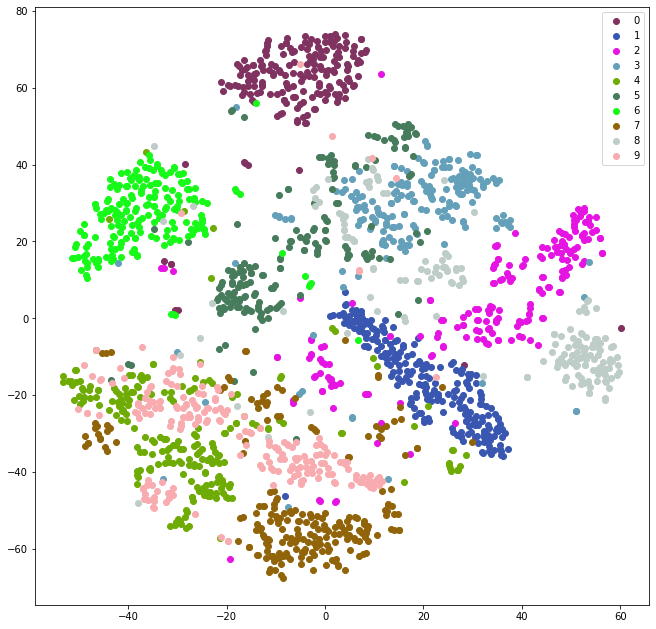

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

# Ojo, aquí no vamos a estandarizar
X_2D = tsne.fit_transform(X)

plt.figure(figsize=(11, 11))

plt.scatter(X_2D[y==0, 0], X_2D[y==0, 1], c=cmap_bold[0], label='0')
plt.scatter(X_2D[y==1, 0], X_2D[y==1, 1], c=cmap_bold[1], label='1')
plt.scatter(X_2D[y==2, 0], X_2D[y==2, 1], c=cmap_bold[2], label='2')
plt.scatter(X_2D[y==3, 0], X_2D[y==3, 1], c=cmap_bold[3], label='3')
plt.scatter(X_2D[y==4, 0], X_2D[y==4, 1], c=cmap_bold[4], label='4')
plt.scatter(X_2D[y==5, 0], X_2D[y==5, 1], c=cmap_bold[5], label='5')
plt.scatter(X_2D[y==6, 0], X_2D[y==6, 1], c=cmap_bold[6], label='6')
plt.scatter(X_2D[y==7, 0], X_2D[y==7, 1], c=cmap_bold[7], label='7')
plt.scatter(X_2D[y==8, 0], X_2D[y==8, 1], c=cmap_bold[8], label='8')
plt.scatter(X_2D[y==9, 0], X_2D[y==9, 1], c=cmap_bold[9], label='9')

plt.legend()

plt.show()

Esta versión se ve mucho mejor, considerando que veníamos de un dataset de 784 _features_. De hecho, si analizamos los resultados, los errores son entendibles. Por ejemplo, se mezclan los números 4 con los 9, pero esto es entendible ya que estos números se parecen visualmente.

Ahora una pregunta natural es por qué usar PCA en vez de T-SNE. La respuesta es que T-SNE **no aprende una representación en bajas dimensiones**, sino que mapea el _dataset_ entero a una baja dimensión. Así, si encontramos una nueva imagen de $28 \times 28$, no podemos mapearla a 2 dimensiones, sino que debemos hacer toda la transformación de nuevo. Esto es una limitante bastante grande cuando estamos en el _pipeline_ de un algoritmo de _Machine Learning_.

Sin embargo, a la hora de explorar un _dataset_, T-SNE es una muy buena herramienta. 